In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [3]:
df2 = df[df['ORD'] == 1]

In [4]:
df['RC_DATE'].min()

np.int64(20190104)

In [5]:
df3 = df2.groupby('RC_DIST')['MEET'].count().reset_index()
print(df3)

    RC_DIST  MEET
0       800   691
1       900   529
2      1000  1033
3      1110   410
4      1200   865
5      1300   434
6      1400   553
7      1600   341
8      1610    66
9      1700    27
10     1800   225
11     1900     3
12     2000    34
13     2200     4


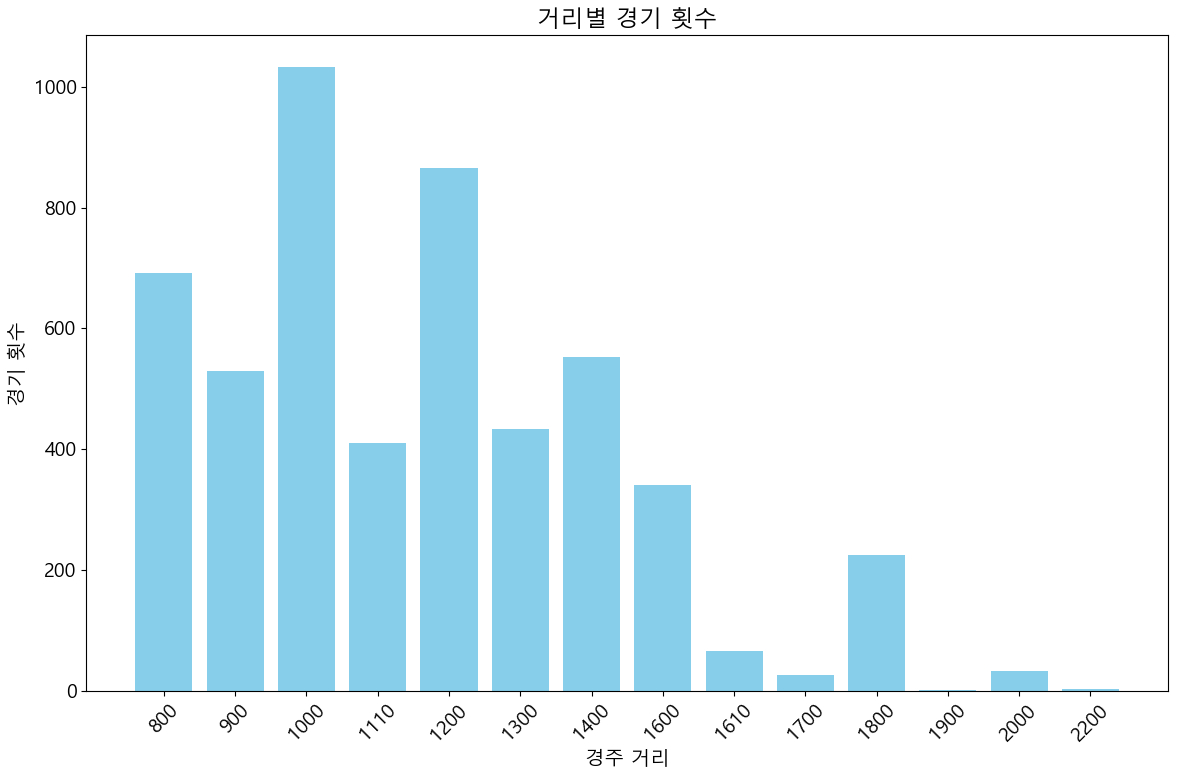

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14
# 바 차트 생성
plt.figure(figsize=(12, 8))
plt.bar(df3['RC_DIST'].astype(str), df3['MEET'], color='skyblue')
plt.xlabel('경주 거리')  # x축 라벨
plt.ylabel('경기 횟수')  # y축 라벨
plt.title('거리별 경기 횟수')  # 제목
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()


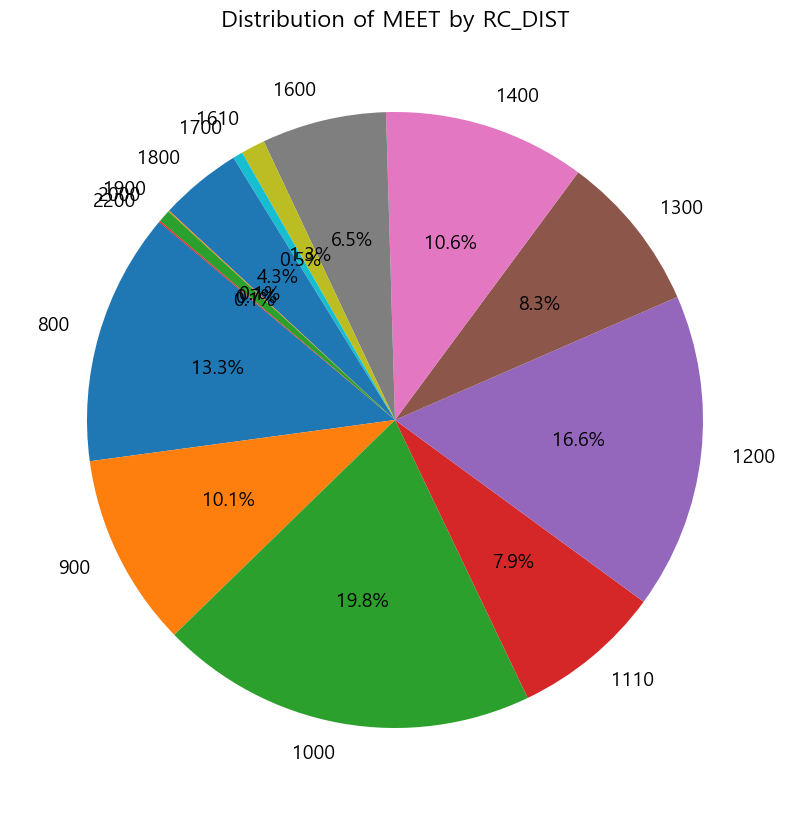

In [7]:
# 각 RC_DIST의 비율 계산
df3['Percentage'] = (df3['MEET'] / df3['MEET'].sum()) * 100

# 파이 차트 생성
plt.figure(figsize=(10, 10))
plt.pie(df3['Percentage'], labels=df3['RC_DIST'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MEET by RC_DIST')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13252\1157411502.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df3.groupby('Group')['MEET'].sum()


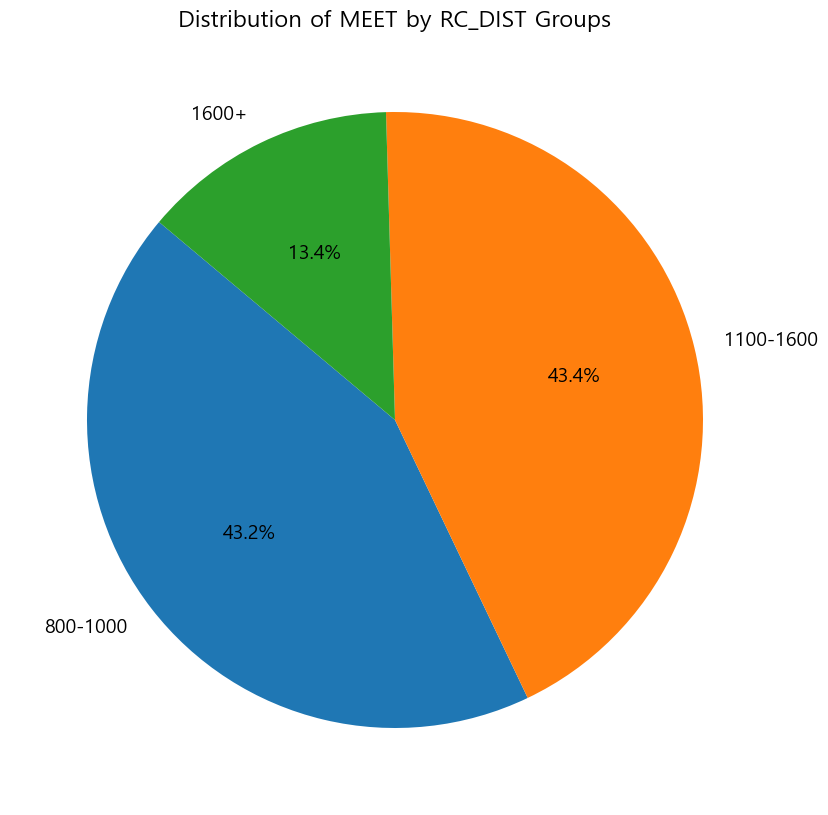

In [8]:
# 그룹 구분
group_labels = ['800-1000', '1100-1600', '1600+']
df3['Group'] = pd.cut(df3['RC_DIST'], bins=[0, 1000, 1400, float('inf')], labels=group_labels)

# 각 그룹별 MEET 합계 계산
grouped_data = df3.groupby('Group')['MEET'].sum()

# 각 그룹의 비율 계산
grouped_data_percentage = (grouped_data / grouped_data.sum()) * 100

# 파이 차트 생성
plt.figure(figsize=(10, 10))
plt.pie(grouped_data_percentage, labels=grouped_data_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MEET by RC_DIST Groups')
plt.show()